<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [41]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
data = pd.read_csv('/content/drive/My Drive/Dataset/M_BAJAS.txt',delimiter='~')
data.Fecha = pd.to_datetime(data.FECHA_BAJA)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
data.head(5)

In [44]:
encabezados= ['Año','Mes','Fecha','Antiguedad','Cant_Bajas']
data.columns=encabezados

In [ ]:
data.head(5)

In [ ]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

In [ ]:
data.describe(include='all')

In [ ]:
data.info 

In [45]:
#Agrupamos la columna antiguedad
#1 : 1 TRIMESTRE (0-93 DIAS)
#2 : 2 TRIMESTRE (94-186 DIAS)
#3 : 3 TRIMESTRE (187-279 DIAS)
#4 : 4 TRIMESTRE (280-370 DIAS)
#5 : A 2 AÑOS (371-725 DIAS) 
#6 : A 3 AÑOS (726-1095 DIAS)
#7 : 4 años en adelante (Máximo DIAS 7276) 
bins=[-1,93,186,279,370,725,1095,7276]
names=['1','2','3','4','5','6','7']
data['Antiguedad'] = pd.cut(data['Antiguedad'],bins,labels=names)

In [46]:
#validamos datos sin clasificar
data[pd.isnull(data.Antiguedad)]

,Año,Mes,Fecha,Antiguedad,Cant_Bajas


In [47]:
#pasamos datos a clasificados a enteror
data['Antiguedad'] = data['Antiguedad'].astype('int64')

In [48]:
data.dtypes

Año            int64
Mes            int64
Fecha         object
Antiguedad     int64
Cant_Bajas     int64
dtype: object

In [49]:
data.head(5)

,Año,Mes,Fecha,Antiguedad,Cant_Bajas
0,2019,11,01/11/2019,6,3
1,2020,4,01/04/2020,6,1
2,2019,11,05/11/2019,7,1
3,2020,2,01/02/2020,7,1
4,2019,8,01/08/2019,6,1


In [ ]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

In [51]:
grupo = data.groupby(by = ['Año','Mes','Antiguedad']).sum()
grupo= pd.DataFrame(grupo).reset_index()

In [52]:
grupo.head(5)

,Año,Mes,Antiguedad,Cant_Bajas
0,2019,1,1,29
1,2019,1,2,28
2,2019,1,3,35
3,2019,1,4,125
4,2019,1,5,587


In [ ]:
 #validamos datos faltantes
 print(pd.isnull(grupo).sum())

In [493]:
#grupo.dropna(subset = ['Cant_Bajas'] , axis=0, inplace=True)

In [495]:
x= grupo.iloc[:,:-1].values
x=np.array(x)
y= grupo.iloc[:,3].values
y = y[:,np.newaxis]

In [496]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder= LabelEncoder()
x[:,2] = labelencoder.fit_transform(x[:,2])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[2])],remainder='passthrough')
x=np.array(ct.fit_transform(x),dtype=np.int)

In [511]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [512]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

In [513]:
from sklearn.linear_model import LinearRegression
lineal_poly = LinearRegression()
lineal_poly.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [514]:
print("precisión del modelo regresión polinomial")
lineal_poly.score(x_poly,y_train)

precisión del modelo regresión polinomial


0.8812301023447452

In [515]:
y_predic = lineal_poly.predict(x_poly_test)

In [519]:
print(len(x_test))
print(len(y_test))

27
27


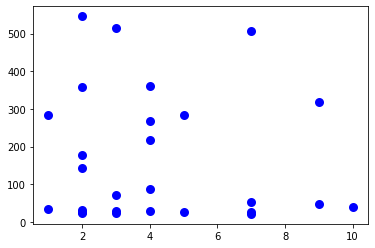

In [532]:
#Gráfica
plt.scatter(x_test[:,8],y_test,color='Blue',linewidth=3)
#plt.plot(x_test,y_predic,color='red',linewidth=3)
plt.show()

In [534]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8
0,0,0,0,1,0,0,0,2020,2
1,0,0,0,0,1,0,0,2020,7
2,0,0,0,0,0,1,0,2019,4
3,0,1,0,0,0,0,0,2019,2
4,0,0,1,0,0,0,0,2019,5
5,0,1,0,0,0,0,0,2020,2
6,0,0,0,0,0,1,0,2020,4
7,0,0,0,1,0,0,0,2020,3
8,0,0,1,0,0,0,0,2019,7
9,0,0,0,0,0,0,1,2020,3


In [533]:
pd.DataFrame(y_test)

,0
0,144.0
1,507.0
2,267.0
3,25.0
4,25.0
5,24.0
6,217.0
7,71.0
8,21.0
9,516.0
